In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
#Read movies data
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
#Read credits data
credits = pd.read_csv('tmdb_5000_credits.csv', low_memory=False)
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [5]:
#Merge data on movie_id
movies = movies.merge(credits[['movie_id','cast', 'crew']], left_on='id', right_on='movie_id', how='left')
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [6]:
#Remove duplicate columns
movies = movies.loc[:, ~movies.columns.duplicated()]
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
#Drop unnecessary columns
movies.drop(columns=['homepage', 'original_title','overview','tagline', 'movie_id', 'spoken_languages'], inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   popularity            4803 non-null   float64
 6   production_companies  4803 non-null   object 
 7   production_countries  4803 non-null   object 
 8   release_date          4802 non-null   object 
 9   revenue               4803 non-null   int64  
 10  runtime               4801 non-null   float64
 11  status                4803 non-null   object 
 12  title                 4803 non-null   object 
 13  vote_average          4803 non-null   float64
 14  vote_count            4803 non-null   int64  
 15  cast                 

In [9]:
#Extract year from release date
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce') 
movies['year'] = movies['release_date'].dt.strftime('%Y')
movies['year'] = pd.to_numeric(movies['year'], errors='coerce').astype('Int64')
movies.head(3)

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015


### Extract cast and crew 

In [10]:
#Extract top 2 cast members from cast column
movies['cast'] = movies['cast'].apply(lambda x: [person['name'] for person in json.loads(x)][:2] if pd.notna(x) else [])
movies.head(3)

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015


In [11]:
#Parse data from json format
import ast  
def extract_names(column):
    return column.apply(lambda x: [d['name'] for d in json.loads(x)] if pd.notna(x) else [])

# Apply function to extract names
movies['genres'] = extract_names(movies['genres'])
movies['keywords'] = extract_names(movies['keywords'])
movies['production_companies'] = extract_names(movies['production_companies'])
movies['production_countries'] = extract_names(movies['production_countries'])


list_columns = ['genres','keywords', 'production_companies', 'production_countries',  'cast']
for col in list_columns:
    movies[col] = movies[col].apply(lambda x: ' | '.join(x) if x else '')
    
movies.head(3)

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year
0,237000000,Action | Adventure | Fantasy | Science Fiction,19995,culture clash | future | space war | space col...,en,150.437577,Ingenious Film Partners | Twentieth Century Fo...,United States of America | United Kingdom,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,Sam Worthington | Zoe Saldana,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009
1,300000000,Adventure | Fantasy | Action,285,ocean | drug abuse | exotic island | east indi...,en,139.082615,Walt Disney Pictures | Jerry Bruckheimer Films...,United States of America,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp | Orlando Bloom,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007
2,245000000,Action | Adventure | Crime,206647,spy | based on novel | secret agent | sequel |...,en,107.376788,Columbia Pictures | Danjaq | B24,United Kingdom | United States of America,2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,Daniel Craig | Christoph Waltz,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015


In [12]:
movies['genres'] = movies['genres'].replace('', np.nan)
movies['keywords'] = movies['keywords'].replace('', np.nan)
movies['production_companies'] = movies['production_companies'].replace('', np.nan)
movies['production_countries'] = movies['production_countries'].replace('', np.nan)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4775 non-null   object        
 2   id                    4803 non-null   int64         
 3   keywords              4391 non-null   object        
 4   original_language     4803 non-null   object        
 5   popularity            4803 non-null   float64       
 6   production_companies  4452 non-null   object        
 7   production_countries  4629 non-null   object        
 8   release_date          4802 non-null   datetime64[ns]
 9   revenue               4803 non-null   int64         
 10  runtime               4801 non-null   float64       
 11  status                4803 non-null   object        
 12  title                 4803 non-null   object        
 13  vote_average      

In [13]:
#Drop records with null release date
movies = movies.dropna(subset=['release_date', 'runtime'])
movies['genres']=movies['genres'].fillna('Unknown')
movies['keywords']=movies['keywords'].fillna('None')
movies['production_countries']=movies['production_countries'].fillna('Unknown')
movies['production_companies']=movies['production_companies'].fillna('Unknown')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4800 non-null   int64         
 1   genres                4800 non-null   object        
 2   id                    4800 non-null   int64         
 3   keywords              4800 non-null   object        
 4   original_language     4800 non-null   object        
 5   popularity            4800 non-null   float64       
 6   production_companies  4800 non-null   object        
 7   production_countries  4800 non-null   object        
 8   release_date          4800 non-null   datetime64[ns]
 9   revenue               4800 non-null   int64         
 10  runtime               4800 non-null   float64       
 11  status                4800 non-null   object        
 12  title                 4800 non-null   object        
 13  vote_average          4

In [14]:
#Extract Directors from crew list
def get_director(crew_list):
    try:
        crew_list = ast.literal_eval(crew_list)
        for member in crew_list:
            if member.get('job') == 'Director':
                return member.get('name')
    except (ValueError, SyntaxError):
        return None
    return None

movies['director'] = movies['crew'].apply(get_director)
movies.head(3)

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year,director
0,237000000,Action | Adventure | Fantasy | Science Fiction,19995,culture clash | future | space war | space col...,en,150.437577,Ingenious Film Partners | Twentieth Century Fo...,United States of America | United Kingdom,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,Sam Worthington | Zoe Saldana,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009,James Cameron
1,300000000,Adventure | Fantasy | Action,285,ocean | drug abuse | exotic island | east indi...,en,139.082615,Walt Disney Pictures | Jerry Bruckheimer Films...,United States of America,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp | Orlando Bloom,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007,Gore Verbinski
2,245000000,Action | Adventure | Crime,206647,spy | based on novel | secret agent | sequel |...,en,107.376788,Columbia Pictures | Danjaq | B24,United Kingdom | United States of America,2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,Daniel Craig | Christoph Waltz,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015,Sam Mendes


In [15]:
#Extract Producers from crew list
def get_producer(crew_list):
    try:
        crew_list = ast.literal_eval(crew_list)
        for member in crew_list:
            if member.get('job') in ['Producer', 'Executive Producer']:
                return member.get('name')
    except (ValueError, SyntaxError):
        return None
    return None

movies['producer'] = movies['crew'].apply(get_producer)
movies.head(3)

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year,director,producer
0,237000000,Action | Adventure | Fantasy | Science Fiction,19995,culture clash | future | space war | space col...,en,150.437577,Ingenious Film Partners | Twentieth Century Fo...,United States of America | United Kingdom,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,Sam Worthington | Zoe Saldana,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009,James Cameron,James Cameron
1,300000000,Adventure | Fantasy | Action,285,ocean | drug abuse | exotic island | east indi...,en,139.082615,Walt Disney Pictures | Jerry Bruckheimer Films...,United States of America,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp | Orlando Bloom,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007,Gore Verbinski,Jerry Bruckheimer
2,245000000,Action | Adventure | Crime,206647,spy | based on novel | secret agent | sequel |...,en,107.376788,Columbia Pictures | Danjaq | B24,United Kingdom | United States of America,2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,Daniel Craig | Christoph Waltz,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015,Sam Mendes,Barbara Broccoli


In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4800 non-null   int64         
 1   genres                4800 non-null   object        
 2   id                    4800 non-null   int64         
 3   keywords              4800 non-null   object        
 4   original_language     4800 non-null   object        
 5   popularity            4800 non-null   float64       
 6   production_companies  4800 non-null   object        
 7   production_countries  4800 non-null   object        
 8   release_date          4800 non-null   datetime64[ns]
 9   revenue               4800 non-null   int64         
 10  runtime               4800 non-null   float64       
 11  status                4800 non-null   object        
 12  title                 4800 non-null   object        
 13  vote_average          4

In [17]:
clean_df = movies.drop(columns = ['crew'])

### EDA

In [18]:
#Data statistics
clean_df.describe().T

,count,mean,min,25%,50%,75%,max,std
budget,4800.0,29060068.024792,0.0,800000.0,15000000.0,40000000.0,380000000.0,40730294.638792
id,4800.0,56949.011667,5.0,9012.75,14623.5,58512.5,447027.0,88292.839372
popularity,4800.0,21.505569,0.000372,4.682212,12.928897,28.350628,875.581305,31.822163
release_date,4800,2002-12-26 00:29:24,1916-09-04 00:00:00,1999-07-12 18:00:00,2005-09-30 12:00:00,2011-02-14 12:00:00,2017-02-03 00:00:00,NaN
revenue,4800.0,82312051.550833,0.0,0.0,19181992.0,92938861.0,2787965087.0,162895004.591028
runtime,4800.0,106.898125,0.0,94.0,103.0,118.0,338.0,22.561593
vote_average,4800.0,6.094458,0.0,5.6,6.2,6.8,10.0,1.188366
vote_count,4800.0,690.646875,0.0,54.0,236.0,737.25,13752.0,1234.852449
year,4800.0,2002.463542,1916.0,1999.0,2005.0,2011.0,2017.0,12.414304


In [19]:
# Select only numeric columns without the id column
numeric_cols = clean_df.select_dtypes(include='number').columns.difference(['id', 'year'])
print(numeric_cols)

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')


#### Histogram

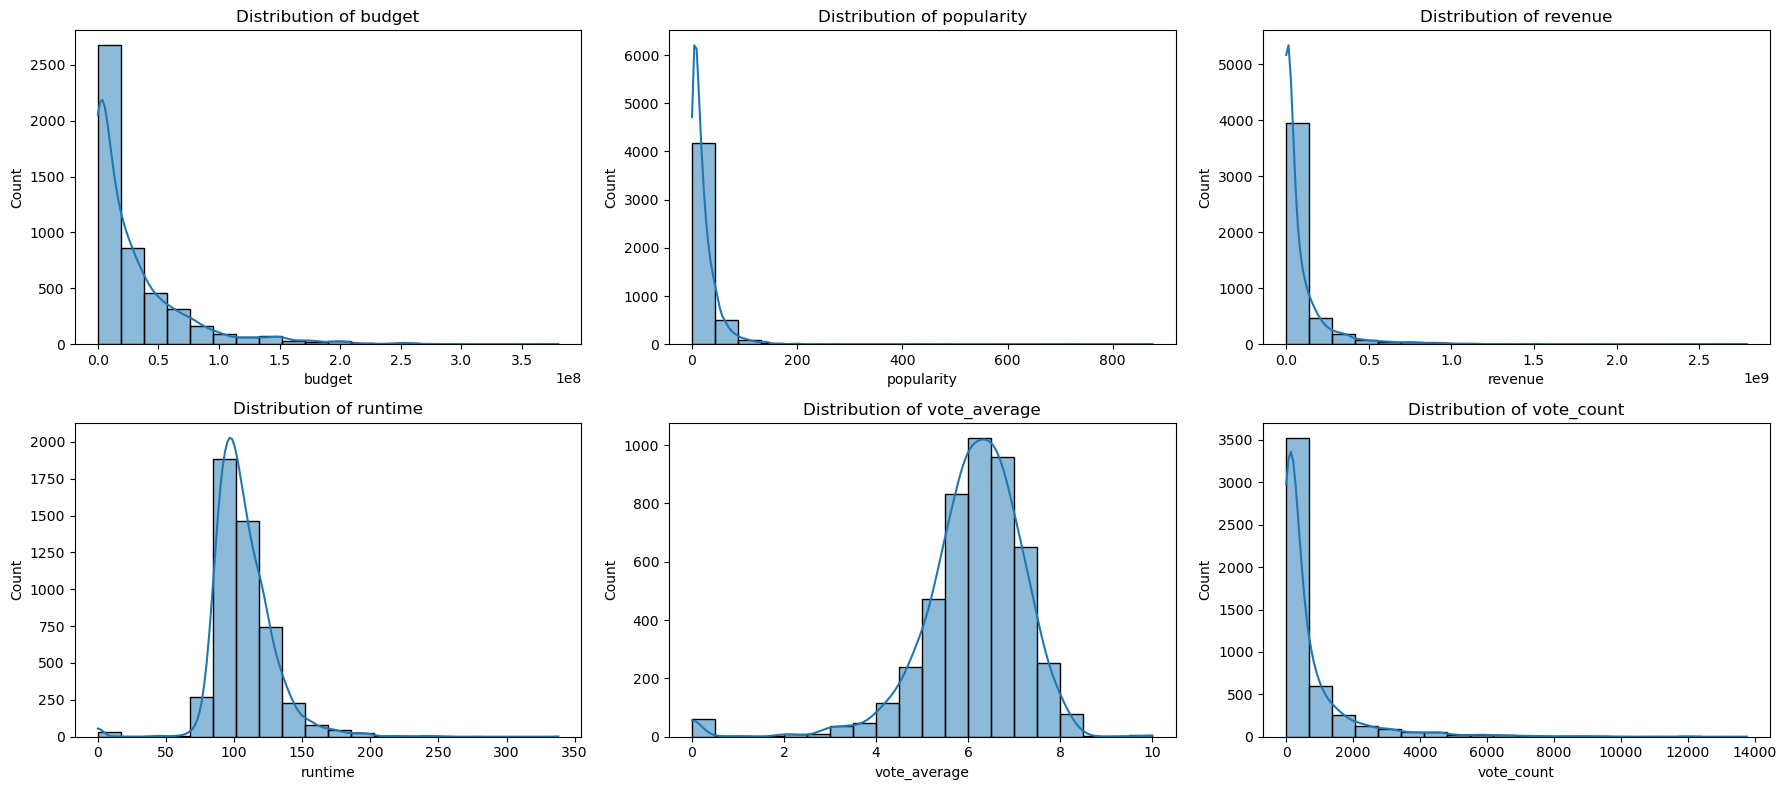

In [20]:
# number of plots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))

# Flatten the 2D axes array to 1D
axes = axes.flatten()
for i, column in enumerate(numeric_cols):
    sns.histplot(data=clean_df, x=column, kde=True,bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

# Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

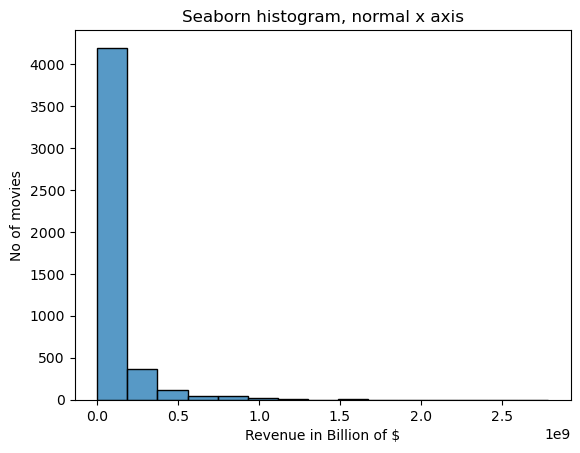

In [21]:
#Revenue in detail
sns.histplot(clean_df['revenue'], bins=15)
plt.gca().set(title='Seaborn histogram, normal x axis')
plt.xlabel('Revenue in Billion of $')
plt.ylabel('No of movies')
plt.show()

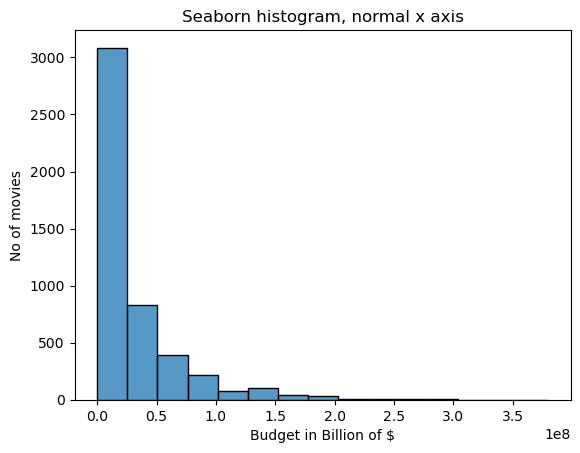

In [22]:
#Budget in detail
sns.histplot(clean_df['budget'], bins=15)
plt.gca().set(title='Seaborn histogram, normal x axis')
plt.xlabel('Budget in Billion of $')
plt.ylabel('No of movies')
plt.show()

#### Log Axis

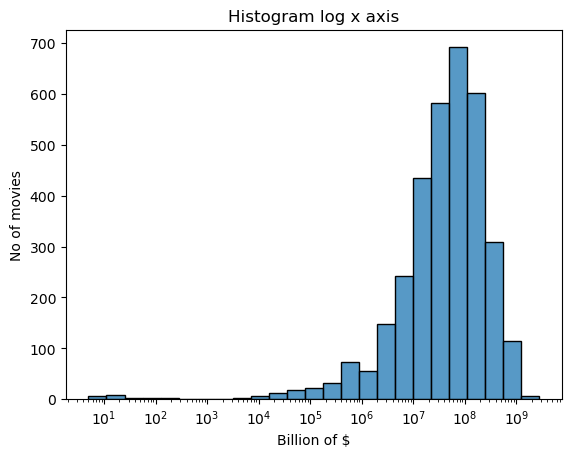

In [23]:
#Revenue in log-scale
sns.histplot(clean_df['revenue'], bins=25, log_scale=True)
plt.gca().set(title='Histogram log x axis')
plt.xlabel('Billion of $')
plt.ylabel('No of movies')
plt.show()

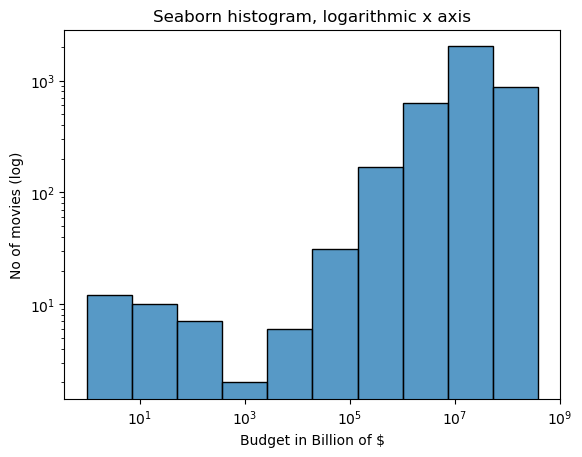

In [24]:
#Budget in log-scale
sns.histplot(clean_df['budget'], bins=10, log_scale=True)
plt.gca().set(title='Seaborn histogram, logarithmic x axis')
plt.xlabel('Budget in Billion of $')
plt.ylabel('No of movies (log)')
plt.yscale('log')
plt.show()

#### Boxplots

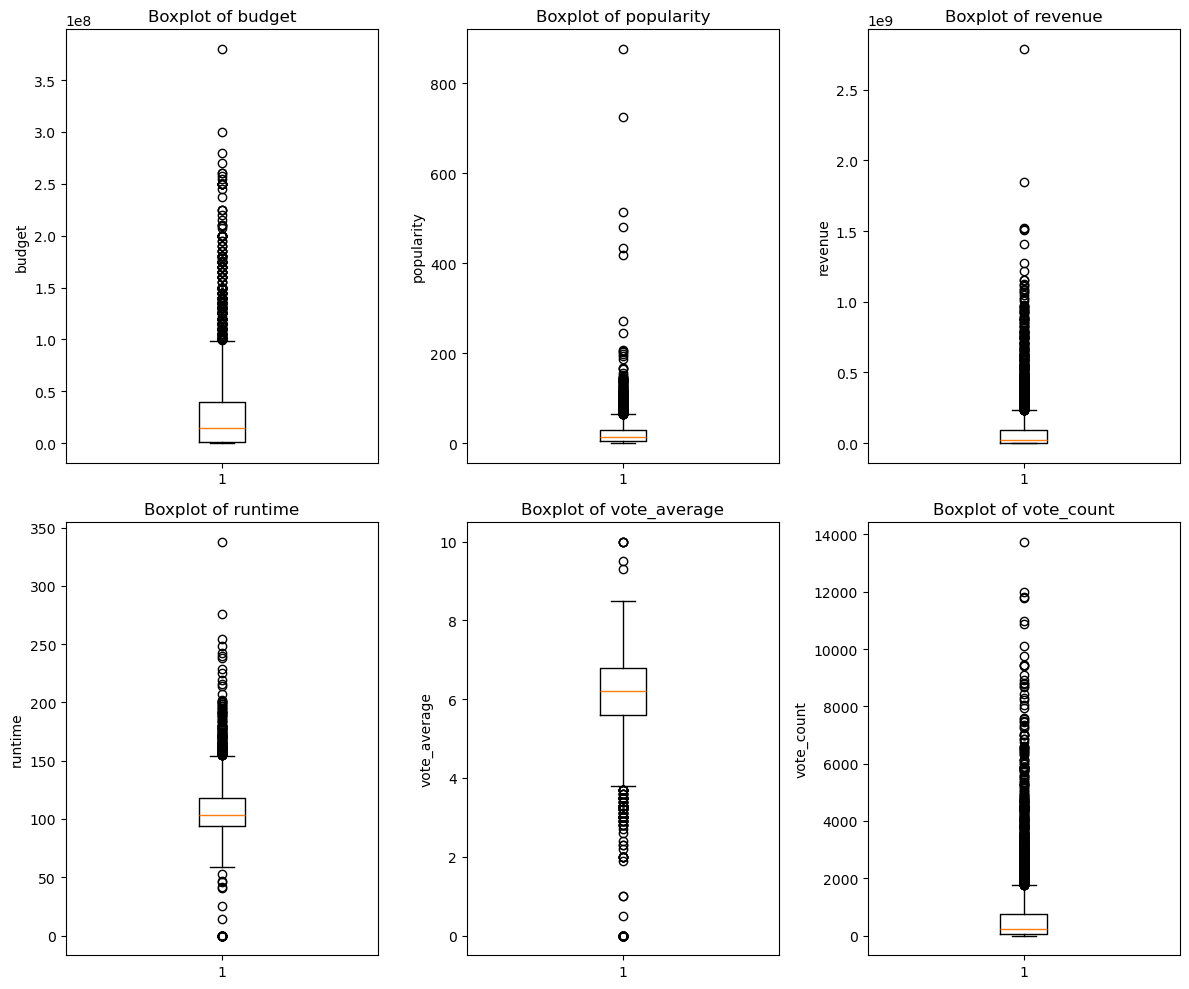

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,10))
# Flatten axes in case it's a 2D array
axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]
# Create a boxplot for each numeric column
for i, column in enumerate(numeric_cols):
    axes[i].boxplot(clean_df[column])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

### Handling outliers

In [26]:
def remove_outliers_iqr(df, columns):
    mask = pd.Series([True] * len(df), index=df.index)
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        col_mask = df[col].between(lower, upper)
        mask &= col_mask  # keep rows that are not outliers in ALL columns
    
    return df[mask]

filtered_df = remove_outliers_iqr(clean_df, numeric_cols)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3790 entries, 83 to 4802
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3790 non-null   int64         
 1   genres                3790 non-null   object        
 2   id                    3790 non-null   int64         
 3   keywords              3790 non-null   object        
 4   original_language     3790 non-null   object        
 5   popularity            3790 non-null   float64       
 6   production_companies  3790 non-null   object        
 7   production_countries  3790 non-null   object        
 8   release_date          3790 non-null   datetime64[ns]
 9   revenue               3790 non-null   int64         
 10  runtime               3790 non-null   float64       
 11  status                3790 non-null   object        
 12  title                 3790 non-null   object        
 13  vote_average          

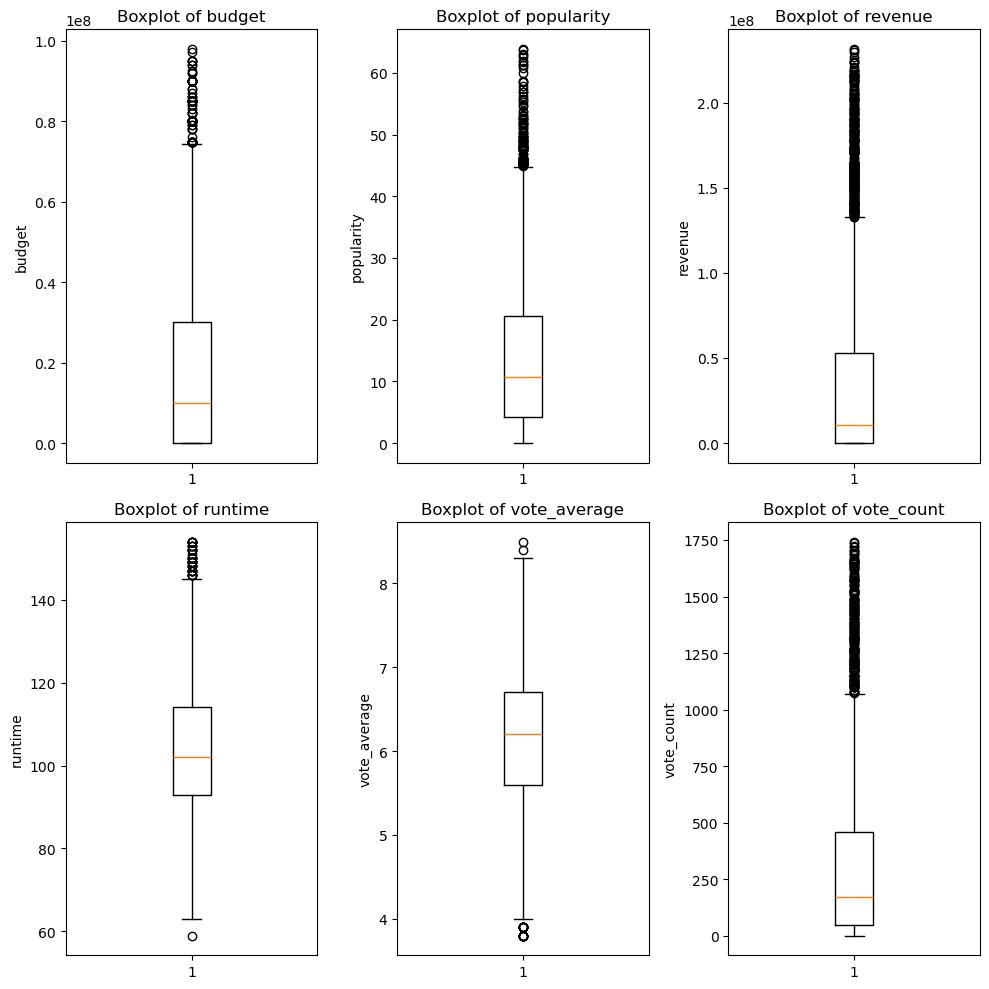

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

# Flatten axes in case it's a 2D array
axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]

# Create a boxplot for each numeric column
for i, column in enumerate(numeric_cols):
    axes[i].boxplot(filtered_df[column])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

In [29]:
#Save data to csv file
filtered_df.to_csv('clean.csv', index=False, sep=',', encoding='utf-8')

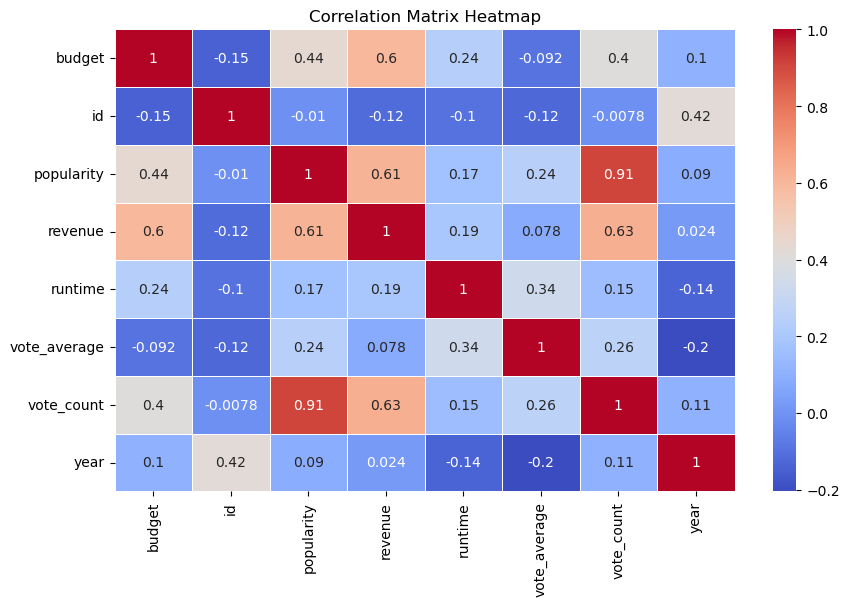

In [30]:
corr_matrix = filtered_df.corr(numeric_only = True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()